In [379]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [655]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

#from matplotlib.colors import ListedColormap
#from sklearn import datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from subprocess import call
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

import xgboost as xgb

import seaborn as sns

from termcolor import colored



#from sklearn.ensemble import VotingClassifier
#from catboost import CatBoostClassifier
#import xgboost

from matplotlib.colors import ListedColormap
%pylab inline

pd.options.mode.chained_assignment = None  # default='warn'

Populating the interactive namespace from numpy and matplotlib


C:\Users\afecn\anaconda3.1\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [839]:
feature = [
 'Cl/min_day',
 'Cl/max_day',
 'max_day-min_day',
 'ADX_5',
 'ADX_14',
 'ADX_28',
 'ADXR_5',
 'ADXR_14',
 'ADXR_28',
 'APO_5',
 'APO_14',
 'APO_28',
 'AROONOSC_5',
 'AROONOSC_14',
 'AROONOSC_28',
 'BOP_5',
 'BOP_14',
 'BOP_28',
 'CCI_5',
 'CCI_14',
 'CCI_28',
 'CMO_5',
 'CMO_14',
 'CMO_28',
 'DX_5',
 'DX_14',
 'DX_28',
 'MFI_5',
 'MFI_14',
 'MFI_28',
 'MINUS_DI_5',
 'MINUS_DI_14',
 'MINUS_DI_28',
 'MINUS_DM_5',
 'MINUS_DM_14',
 'MINUS_DM_28',
 'MOM_5',
 'MOM_14',
 'MOM_28',
 'PLUS_DI_5',
 'PLUS_DI_14',
 'PLUS_DI_28',
 'PLUS_DM_5',
 'PLUS_DM_14',
 'PLUS_DM_28',
 'PPO_5',
 'PPO_14',
 'PPO_28',
 'ROC_5',
 'ROC_14',
 'ROC_28',
 'ROCP_5',
 'ROCP_14',
 'ROCP_28',
 'ROCR_5',
 'ROCR_14',
 'ROCR_28',
 'ROCR100_5',
 'ROCR100_14',
 'ROCR100_28',
 'RSI_5',
 'RSI_14',
 'RSI_28',
 'TRIX_5',
 'TRIX_14',
 'TRIX_28',
 'ULTOSC_5',
 'ULTOSC_14',
 'ULTOSC_28',
 'WILLR_5',
 'WILLR_14',
 'WILLR_28',
 'HT_DCPERIOD_5',
 'HT_DCPERIOD_14',
 'HT_DCPERIOD_28',
 'HT_DCPHASE_5',
 'HT_DCPHASE_14',
 'HT_DCPHASE_28',
 'HT_TRENDMODE_5',
 'HT_TRENDMODE_14',
 'HT_TRENDMODE_28',
 'DEMA_5',
 'DEMA_14',
 'DEMA_28',
 'EMA_5',
 'EMA_14',
 'EMA_28',
 'HT_TRENDLINE_5',
 'HT_TRENDLINE_14',
 'HT_TRENDLINE_28',
 'KAMA_5',
 'KAMA_14',
 'KAMA_28',
 'MA_5',
 'MA_14',
 'MA_28',
 'MIDPOINT_5',
 'MIDPOINT_14',
 'MIDPOINT_28',
 'MIDPRICE_5',
 'MIDPRICE_14',
 'MIDPRICE_28',
 'SMA_5',
 'SMA_14',
 'SMA_28',
 'T3_5',
 'T3_14',
 'T3_28',
 'TEMA_5',
 'TEMA_14',
 'TEMA_28',
 'TRIMA_5',
 'TRIMA_14',
 'TRIMA_28',
 'WMA_5',
 'WMA_14',
 'WMA_28',
 'ATR_5',
 'ATR_14',
 'ATR_28',
 'NATR_5',
 'NATR_14',
 'NATR_28',
 'TRANGE_5',
 'TRANGE_14',
 'TRANGE_28',
 'AD_5',
 'AD_14',
 'AD_28',
 'ADOSC_5',
 'ADOSC_14',
 'ADOSC_28',
 'OBV_5',
 'OBV_14',
 'OBV_28',
 'AROON_aroondown',
 'AROON_aroonup',
 'MACD_macd',
 'MACD_macdsignal',
 'MACD_macdhist',
 'MACDEXT_macd',
 'MACDEXT_macdsignal',
 'MACDEXT_macdhist',
 'MACDFIX_macd',
 'MACDFIX_macdsignal',
 'MACDFIX_macdhist',
 'STOCH_slowk',
 'STOCH_slowd',
 'STOCHF_fastk',
 'STOCHF_fastd',
 'STOCHRSI_fastk',
 'STOCHRSI_fastd',
 'HT_PHASOR_inphase',
 'HT_PHASOR_quadrature',
 'HT_SINE_sine',
 'HT_SINE_leadsine',
 'BBANDS_upperband',
 'BBANDS_middleband',
 'BBANDS_lowerband',
 'MAMA_mama',
 'MAMA_fama',
 'Min10',
 'Min1000',
 'Min10_1300',
 'Min10_1000'
]

In [381]:

#разбивка датасетов
def dating(year):
    X_all_16 = X_all[                         (data[column] != year)]
    X_all_19 = X_all[                         (data[column] ==  year)]
    y_all_16 = y_all[                         (data[column] != year)]
    y_all_19 = y_all[                         (data[column] ==  year)]
    X_train, X_test, y_train, y_test = train_test_split(
    X_all_16,
    y_all_16, 
    test_size = 0.3,
    random_state = 1)
    return X_train, X_test, y_train, y_test, X_all_16, y_all_16, X_all_19, y_all_19 

#прогнозы
def result_(varP, varM):
    tablep = pd.pivot_table(
    matrix_year[(matrix_year['2proba']>=varP) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    
    tablem = pd.pivot_table(
    matrix_year[(matrix_year['1proba']>varM) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    table = pd.concat([tablep, tablem], axis=1)
#    table.columns = ['Profit%_c','Count','Profit%','Profit+-']
#    table.pop('Profit%_c')
    return table

def feat_():
    tablef = pd.pivot_table(
    matrix_year[(matrix_year[column] >200)],                      
            margins=True, index=all, values = 'f_' + X_train.columns,        
            aggfunc=['mean']).round(2)
    return tablef
    

In [578]:
pd.merge(TA_block4[TA_block4['Time'] == from_], profit_TIME[profit_TIME['Time'] == from_], on = ['Date', 'Time', 'Symbol'], how='inner')
profit_TIME[profit_TIME['Time'] == from_]
profit_TIME[profit_TIME['Time'].dt.time == datetime.time(10,45,0)]['Time']


,Unnamed: 0,Date,Close,Close10:45:00,Close11:45:00,Close12:45:00,Close13:45:00,Close14:45:00,Close15:45:00,Close16:45:00,...,Proft1000,Proft1300,Proft1830,Profi_GEP,Pro_Morni,Min10,Min1000,Min10_1300,Min10_1000,Time
0,0,2006-01-23,220.500000,220.500000,220.449997,220.850006,220.850006,221.330002,220.729996,220.440002,...,-0.054420,-0.013605,1.587302,0.680710,0.040837,NaN,0.000000,NaN,NaN,2020-09-25 10:45:00
1,1,2006-01-24,220.380005,220.490006,219.800003,220.470001,220.000000,220.130005,221.630005,222.199997,...,3.995645,2.816450,3.578393,2.366073,-1.133888,0.730964,0.049914,-0.163007,-0.004533,2020-09-25 10:45:00
2,2,2006-01-25,229.300003,229.000000,227.869995,226.699997,227.210007,228.149994,229.500000,228.789993,...,-0.305676,-0.393010,-1.978165,-0.035030,-0.087603,2.232143,-0.130834,3.869007,3.911423,2020-09-25 10:45:00
3,3,2006-01-26,228.300003,228.500000,227.550003,228.100006,227.000000,227.800003,227.600006,226.699997,...,-1.089718,-1.750547,0.109409,0.686058,-0.668110,0.052542,0.087603,0.794002,-0.348889,2020-09-25 10:45:00
4,4,2006-01-27,226.009994,225.300003,225.600006,224.500000,229.500000,229.100006,229.300003,227.000000,...,2.197069,0.088769,-4.127831,0.655738,-2.062975,0.369761,-0.314142,-1.227533,-1.314060,2020-09-25 10:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123132,2671,2018-04-03,0.051180,0.050970,0.051090,0.052280,0.052190,0.052410,0.052460,0.052360,...,0.152790,-0.152783,0.019104,0.267686,-0.305107,2.385606,2.305582,0.886318,1.531898,2020-09-25 16:45:00
123133,2672,2018-04-04,0.052440,0.052370,0.052260,0.052280,0.052320,0.052280,0.052140,0.052240,...,1.052837,1.818532,3.273358,0.801986,0.757717,-0.114723,-0.381388,-0.076515,2.071118,2020-09-25 16:45:00
123134,2673,2018-04-05,0.052790,0.053130,0.053050,0.053190,0.053380,0.053600,0.053510,0.053780,...,1.617702,2.138341,3.012268,1.297498,0.512351,2.692381,1.875355,2.869166,2.555305,2020-09-25 16:45:00
123135,2674,2018-04-06,0.054650,0.054630,0.054990,0.054930,0.055290,0.055200,0.054850,0.054930,...,-3.058440,-9.612237,-8.246861,-3.880865,-6.760565,1.816497,0.512351,3.271293,4.053798,2020-09-25 16:45:00


In [382]:
%%time

# #TA+4block
#TA_block4   = pd.read_csv('E:/Host/Data/Database/10min/TA_block4.csv',   parse_dates=['Date', 'Time'])
# #создать target
#profit_TIME = pd.read_csv('E:/Host/Data/Database/10min/profit_TIME_1840.csv', parse_dates=['Date', 'Time'])

#TA+4block
TA_block4   = pd.read_csv('TA_block4.csv', parse_dates=['Date', 'Time'])
#создать target
profit_TIME = pd.read_csv('profit_TIME.csv', parse_dates=['Date', 'Time'])

Wall time: 19.2 s


In [811]:
Target_list = ['ProftLaBa', 'Proft1000', 'Proft1300', 'Proft1830', 'Profi_GEP', 'Pro_Morni',]
feature =  [
 'Min10',
# 'Min1000',
# 'Min10_1300',
# 'Min10_1000',
 'Cl/min_day',
# 'Cl/max_day',
 'max_day-min_day',


           ]

In [825]:
%%time

# сама модель БЕЗ ВЫБОРА ФИЧЕЙ 

n_ = 2

feat_importances = pd.DataFrame()
matrix   = pd.DataFrame()
matrix_year_nul = pd.DataFrame()
matrix_2 = pd.DataFrame()
matrix_100 = pd.DataFrame()
matrix_2_100  = pd.DataFrame()
matrix_year   = pd.DataFrame()

matrix_year_h = pd.DataFrame()

forecast = pd.DataFrame()

for from_ in [datetime.time(10,45,0), datetime.time(11,45,0),datetime.time(12,45,0),datetime.time(13,45,0),datetime.time(14,45,0),datetime.time(15,45,0),datetime.time(16,45,0),]:
    data = shose(from_)
    data['Year'] = data ['Date'].dt.year
    column = 'Year'
    for Target in Target_list:
   #      data['Target_'] = np.where(data['Proft1300']>0.0, np.where(data['Proft1830']>-1,1,0),0)
        data['Target_'] = np.where(data[Target]>0.0, 1, 0)
        data['Profit_carrent'] = data[Target]
        for itera_2 in [0.4]:
            for itera_1 in [25]:
                for itera in [2]:
                    for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]:

  #                      print(str(from_) + ' ' + str(Target) + ' ' + str(year) + ' ' + str(itera) + ' ' + str(itera_1) + ' ' + str(itera_2))

  #                      print('****')
                    



                        X_all = data[feature] 
                        y_all = data['Target_']    
                        X_train = X_all[(data[column] <  year)&(data[column] >= 2006)]
                        X_test  = X_all[data[column]  == year]
                        y_train = y_all[(data[column] <  year)&(data[column] >= 2006)]
                        y_test  = y_all[data[column]  == year]

#                        display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


                        model = xgb.XGBClassifier(n_estimators=itera_1, max_depth = itera, random_state=1, n_jobs = -1)
                        model.fit(X_train, y_train)
                        estimator = model.estimators_[0]

                        fi = pd.Series(model.feature_importances_).round(3)
                        fi1 = pd.concat([pd.Series(feature), fi], axis = 1)
    #                   display(fi1)
                        feat_importances = pd.concat([feat_importances, fi1], axis = 1)
    #                   display(feat_importances)


                        predictions_X_train     = model.predict(X_train)
                        predictions_X_test      = model.predict(X_test)
                        predictions_X_all       = model.predict(X_all)
                        predictions_proba_X_all = model.predict_proba(X_all)

                                    #Добавялем пробы в data.copy
                                    #data_copy = data.copy()
                        data['y_all'] =  y_all
                        data['predictions_X_all']  = predictions_X_all
                        for number_ in range(1, n_+1, 1):
                            data[str(number_)+'proba'] = predictions_proba_X_all[:, number_-1]


                        matrix_2018 = data[data[column]   == year]
                        matrix_2018 = matrix_2018.assign(itera_2 = str(itera_2),
                                                         Target  = str(Target),
                                                         itera_1   = str(itera_1),
                                                         itera   = str(itera),
                                                         from_   = str(from_)
                                                        )
                      #vertical
                        matrix_2018_null = data[data[column]   == year]
                        matrix_2018_null = matrix_2018_null.assign(itera_2 = str(itera_2),
                                                         Target  = str(Target),
                                                         itera_1 = str(itera_1),
                                                         itera   = str(itera),
                                                         from_   = str(from_)
                                                        )
                        matrix_year_nul  = matrix_year_nul.append(matrix_2018_null, ignore_index=True)
                        #vertical
                        
#                        display(matrix_2018[['Target','from_', 'Date', 'Time', 'Profit_carrent', 'Year']].head(20))
                        matrix_year   = matrix_year.append(matrix_2018, ignore_index=True)
                    #vertical
                    matrix_year_h = pd.concat([matrix_year_h, matrix_year_nul], axis=1)
                    matrix_year_nul = pd.DataFrame()

                    #vertical
matrix_year['date_time'] = pd.to_datetime(matrix_year['Date'].astype(str) + " " + matrix_year['Time'].dt.time.astype(str)) # привести в порядок и создать новый столбец

matrix_year['proba2_range'] = \
                np.where(matrix_year['2proba']>0.56, 0.56,
                np.where(matrix_year['2proba']>0.55, 0.55,         
                np.where(matrix_year['2proba']>0.54, 0.54, 
                np.where(matrix_year['2proba']>0.53, 0.53,
                np.where(matrix_year['2proba']>0.52, 0.52, 
                np.where(matrix_year['2proba']>0.51, 0.51, 
                np.where(matrix_year['2proba']>0.50, 0.50, 0.49)))))))                 
#print(result_(0.55,0.5))

AttributeError: 'XGBClassifier' object has no attribute 'estimators_'

In [700]:
fi1.sort_values(by = 1, ascending=False)

,0,1
4,Cl/min_day,0.158
6,max_day-min_day,0.149
2,Min10_1300,0.145
0,Min10,0.140
1,Min1000,0.140
3,Min10_1000,0.139
5,Cl/max_day,0.129


In [840]:
%%time

# точность теста в профите

n_ = 2

feat_importances = pd.DataFrame()
matrix   = pd.DataFrame()

matrix_2 = pd.DataFrame()
matrix_100 = pd.DataFrame()
matrix_2_100  = pd.DataFrame()
matrix_year   = pd.DataFrame()

matrix_year_h = pd.DataFrame()

forecast = pd.DataFrame()

for from_ in [datetime.time(12,45,0)]:
    data = shose(from_)
    data['Year'] = data ['Date'].dt.year
    column = 'Year'
    for Target in Target_list:
        data['Target_'] = np.where(data[Target]>0, 1, 0)
        data['Profit_carrent'] = data[Target]
        for itera_2 in [0.4]:
            for itera_1 in [25]:
                for itera in [2]:
                    for year in [2018]:

  #                      print(str(from_) + ' ' + str(Target) + ' ' + str(year) + ' ' + str(itera) + ' ' + str(itera_1) + ' ' + str(itera_2))

  #                      print('****')
                    


                        data    = data[data[column]>=210]
                        X_train = data[feature] 
                        y_train = data['Target_']   
 #                       display(X_train.shape, y_train.shape, data.shape)



#                        display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


                        model = xgb.XGBClassifier(n_estimators=itera_1, max_depth = itera, random_state=1)
                                
                        model.fit(X_train, y_train)
                     #   estimator = model.estimators_[0]

                        fi = pd.Series(model.feature_importances_).round(3)
                        fi1 = pd.concat([pd.Series(feature), fi], axis = 1)
    #                   display(fi1)
                        feat_importances = pd.concat([feat_importances, fi1], axis = 1)
    #                   display(feat_importances)


                        predictions_proba_X_all = model.predict_proba(X_train)
                        predictions_X_all       = model.predict(X_train)
                        

                        for number_ in range(1, n_+1, 1):
                            data[str(number_)+'proba'] = predictions_proba_X_all[:, number_-1]
                            

                        matrix_2018 = data
                        matrix_2018['y_all'] =  y_train
                        matrix_2018['x_all'] =  predictions_X_all
                        matrix_2018 = matrix_2018.assign(itera_2 = str(itera_2),
                                                         Target  = str(Target),
                                                         itera_1 = str(itera_1),
                                                         itera   = str(itera),
                                                         from_   = str(from_)
                                                         
                                                        )


                        matrix_year =  matrix_year.append(matrix_2018, ignore_index=True)

matrix_year['date_time'] = pd.to_datetime(matrix_year['Date'].astype(str) + " " + matrix_year['Time'].dt.time.astype(str)) # привести в порядок и создать новый столбец

matrix_year['proba2_range'] = \
                np.where(matrix_year['2proba']>0.56, 0.56,
                np.where(matrix_year['2proba']>0.55, 0.55,         
                np.where(matrix_year['2proba']>0.54, 0.54, 
                np.where(matrix_year['2proba']>0.53, 0.53,
                np.where(matrix_year['2proba']>0.52, 0.52, 
                np.where(matrix_year['2proba']>0.51, 0.51, 
                np.where(matrix_year['2proba']>0.50, 0.50, 0.49))))))) 


Wall time: 8.35 s


In [842]:
matrix_year[(matrix_year['Target'] == 'Proft1000')&(matrix_year['from_'] == '12:45:00')].groupby(['proba2_range'])['Min10', 'Proft1000',  'Cl/min_day', 'max_day-min_day',].agg(['count', 'mean', 'max', 'min'])

C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Min10                                 Proft1000            \
             count      mean        max        min     count      mean   
proba2_range                                                             
0.49          6838 -0.073645  22.653058 -31.509843      6838 -0.263570   
0.50          1648 -0.075311   8.181821 -43.333333      1648  0.038188   
0.51          1577 -0.013738   9.502262  -6.506667      1577  0.090522   
0.52          1389 -0.161170   6.047544  -9.470690      1389  0.068133   
0.53          1038 -0.210436   4.303728 -42.013129      1038  0.101844   
0.54           918 -0.084368   8.202242  -9.603634       918  0.219849   
0.55           767  0.069126  10.462706  -7.423767       767  0.253801   
0.56          3379  0.443425  26.772011 -38.479809      3379  0.661283   

                                   Cl/min_day                            \
                    max        min      count      mean        max  min   
proba2_range                                                              
0.49          36.892707 -40.314133       6838  0.662328  21.495324  0.0   
0.50          10.567010 -10.480956       1648  0.694175   5.100460  0.0   
0.51           9.529671 -11.009698       1577  0.740101   7.079641  0.0   
0.52          27.788156 -20.447625       1389  0.778547   7.112967  0.0   
0.53          11.320755 -10.747962       1038  0.865746   6.456033  0.0   
0.54          13.449006  -9.131278        918  0.987569   7.397769  0.0   
0.55          13.099273 -10.456832        767  1.098627   7.252916  0.0   
0.56          25.351685 -33.006664       3379  1.785461  27.215970  0.0   

             max_day-min_day                                 
                       count      mean        max       min  
proba2_range                                                 
0.49                    6838  1.816407  23.913043  0.246020  
0.50                    1648  1.549382  16.598040  0.249995  
0.51                    1577  1.547026   8.919383  0.251298  
0.52                    1389  1.654164  12.244355  0.335299  
0.53                    1038  1.716973  21.132075  0.357650  
0.54                     918  1.828243  17.939959  0.187084  
0.55                     767  1.902748   7.769551  0.552072  
0.56                    3379  2.551479  24.797082  0.414845

In [579]:
# к TA_block4 добавлаям профиты по отсечке
def shose(from_):
    df = pd.merge(TA_block4[TA_block4['Time'].dt.time == from_], profit_TIME[profit_TIME['Time'].dt.time == from_], on = ['Date', 'Time', 'Symbol'], how='inner')
    df.drop_duplicates(['Date', 'Time', 'Symbol'], inplace = True)
    df.dropna(inplace = True)
    return(df)

In [843]:
for oo in ['1','2','4','6','8','10']:
    ff = matrix_year[(matrix_year['Target'] == 'Proft1000')&(matrix_year['2proba'] >= 0.53)&(matrix_year['itera'] == oo)]
    display(confusion_matrix((ff['y_all']), (ff['x_all'])))
    display(accuracy_score  ((ff['y_all']), (ff['x_all'])))

array([], shape=(0, 0), dtype=int64)

C:\Users\afecn\anaconda3.1\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\afecn\anaconda3.1\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

array([[   0, 2305],
       [   0, 3797]], dtype=int64)

0.622254998361193

array([], shape=(0, 0), dtype=int64)

nan

array([], shape=(0, 0), dtype=int64)

nan

array([], shape=(0, 0), dtype=int64)

nan

array([], shape=(0, 0), dtype=int64)

nan

In [844]:
#пьяное пиво 2


pivo1 = pd.pivot_table(matrix_year[matrix_year['2proba'] > -0.55],
                      index=['Symbol', 'date_time', 'Time'],
                       values=['2proba'],
                       columns=['Target'],
                       aggfunc=['mean'],
                      # margins=True
                      )
pivo2 = pd.pivot_table(matrix_year[matrix_year['2proba'] > -0.55],
                      index=['Symbol', 'date_time', 'Time'],
                       values=['2proba', 'Pro_Morni', 'Profi_GEP', 'ProftLaBa', 'Proft1000','Proft1300','Proft1830', 'Min10',
 'Min1000',
 'Min10_1300',
 'Min10_1000',
 'Cl/min_day',
 'Cl/max_day',
 'max_day-min_day'],
                       
                       aggfunc=['mean'],
                      # margins=True
                      )
pivo3 = pd.concat([pivo1, pivo2], axis=1)

pivo3 = pivo3.reset_index()

pivo3.columns = ['Symbol',
 'date_time',
 'time',                
 '2proba_Pro_Morni',
 '2proba_Profi_GEP',
 '2proba_Proft1000',
 '2proba_Proft1300',
 '2proba_Proft1830',
 '2proba_ProftLaBa',
 '2proba',
 'Cl/max_day',
 'Cl/min_day',
 'Min10',
 'Min1000',
 'Min10_1000',
 'Min10_1300',
 'Pro_Morni',
 'Profi_GEP',
 'Proft1000',
 'Proft1300',
 'Proft1830',
 'ProftLaBa',
 'max_day-min_day']

pivo3['Year'] = pivo3['date_time'].dt.year

#еще комбинаторики 
pivo3['pr_comb'] = pivo3['Proft1300'].where(pivo3['Profi_GEP']<100, pivo3['Proft1000'])
pivo3



,Symbol,date_time,time,2proba_Pro_Morni,2proba_Profi_GEP,2proba_Proft1000,2proba_Proft1300,2proba_Proft1830,2proba_ProftLaBa,2proba,...,Min10_1300,Pro_Morni,Profi_GEP,Proft1000,Proft1300,Proft1830,ProftLaBa,max_day-min_day,Year,pr_comb
0,GAZP,2006-01-30 12:45:00,2020-09-25 12:45:00,0.542663,0.511193,0.457105,0.485425,0.517468,0.490139,0.500665,...,0.445434,2.116083,1.296298,-2.971174,-0.917963,-2.873612,-4.212860,3.046568,2006,-0.917963
1,GAZP,2006-01-31 12:45:00,2020-09-25 12:45:00,0.381380,0.587661,0.530340,0.552683,0.581489,0.532054,0.527601,...,-0.917963,1.149425,-0.694002,-2.654072,-1.535153,0.250644,-1.973767,3.191152,2006,-1.535153
2,GAZP,2006-02-01 12:45:00,2020-09-25 12:45:00,0.456740,0.617559,0.525488,0.508577,0.530515,0.485843,0.520787,...,-1.535153,-1.538803,0.093750,1.909089,0.340909,0.681818,1.813639,3.272726,2006,0.340909
3,GAZP,2006-02-02 12:45:00,2020-09-25 12:45:00,0.486900,0.439559,0.457057,0.467175,0.490133,0.480261,0.470181,...,0.340909,0.665136,-1.580135,-1.245753,-0.588903,0.117778,0.339751,1.961496,2006,-0.588903
4,GAZP,2006-02-03 12:45:00,2020-09-25 12:45:00,0.483672,0.634231,0.563628,0.541874,0.524965,0.510079,0.543075,...,-0.588903,-0.004512,0.221712,0.934155,0.929601,0.455685,0.710867,1.225793,2006,0.929601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,VTBR,2018-04-02 12:45:00,2020-09-25 12:45:00,0.466541,0.583845,0.491259,0.469630,0.437799,0.358767,0.467973,...,0.894242,2.149277,0.078221,-1.387279,0.732181,0.770713,-1.464355,0.847778,2018,0.732181
17550,VTBR,2018-04-03 12:45:00,2020-09-25 12:45:00,0.367013,0.646677,0.567132,0.482565,0.493517,0.423195,0.496683,...,0.732181,-0.305107,0.267686,0.306041,0.000000,0.172150,0.038252,4.456773,2018,0.000000
17551,VTBR,2018-04-04 12:45:00,2020-09-25 12:45:00,0.463022,0.465659,0.447972,0.477129,0.466094,0.450935,0.461802,...,0.000000,0.757717,0.801986,0.975516,1.740625,3.194338,0.172150,0.841616,2018,1.740625
17552,VTBR,2018-04-05 12:45:00,2020-09-25 12:45:00,0.470423,0.479979,0.494680,0.448092,0.450549,0.437225,0.463491,...,1.740625,0.512351,1.297498,2.744879,3.271293,4.154914,1.428842,1.880049,2018,3.271293


In [916]:
import matplotlib.pyplot as plt

dic = {}
for_ = ['GAZP','GMKN','LKOH','ROSN','SBER','VTBR']
graf = pd.pivot_table(profit_TIME,
                     index=['Date'],
                      columns = 'Symbol',
                      values  = 'Closelast_bar'
                     )
graf = graf.dropna()

for dd in for_:    
    dic[f'{dd}_pr'] = (graf[dd]/graf[dd].shift(1)-1)*100
    
#display(graf)

graf = pd.concat([graf, pd.DataFrame(dic)], axis=1)
graf['mean']   = pd.DataFrame(dic).mean(axis=1)
graf = graf[graf.index.year >= 2010]
graf = graf.reset_index()

graf

In [ ]:
%run library.ipynb

#создфем график
#СОРТИРОВКА ПО ВЕРОЯТНОСТИ

proba_all  = ['2proba_Proft1000', '2proba_Proft1300', '2proba_Proft1830', '2proba_ProftLaBa']
tresh  = 0.55
time_  = datetime.time(12,45,0)
con = pd.DataFrame()

plot = plot(proba_all, tresh, time_)
plot

for_ = 'Proft1300'
graf_my = pd.pivot_table(plot,
                     index=['Date'],
                      values  = for_
                     )
graf_my = graf_my.dropna()
    
#display(graf)

graf_my = graf_my.reset_index()
graf_my['Date'] = pd.to_datetime(graf_my['Date'])
graf_my['Date'].dt.year

display(graf_my.agg(['mean', 'count']))
graf_my

In [ ]:
plot_merg = pd.merge(graf_my, graf, on = 'Date', how = 'right', )
#
plot_merg.sort_values(by = 'Date', inplace = True)
plot_merg.fillna(0, inplace = True)

plot_merg = plot_merg.reset_index()

plot_merg['equity'] = nan
plot_merg['equity_my'] = nan
plot_merg['equity'][0]    = 100
plot_merg['equity_my'][0] = 100
for ii in range(1, len(plot_merg),1): 
    plot_merg['equity']   [ii] = (1+plot_merg['mean']     [ii]/100)*plot_merg['equity']   [ii-1]
    plot_merg['equity_my'][ii] = (1+plot_merg['Proft1000'][ii]/100)*plot_merg['equity_my'][ii-1]

plot_merg
#plot_merg.to_excel('dfd1.xlsx')

plt.figure(figsize=(32,10))
plt.plot(plot_merg['equity'])
plt.plot(plot_merg['equity_my'])
plt.xlabel(plot_merg['Date'].dt.year.any())
plt.show()

,Date,GAZP,GMKN,LKOH,ROSN,SBER,VTBR,GAZP_pr,GMKN_pr,LKOH_pr,ROSN_pr,SBER_pr,VTBR_pr,mean
0,2010-01-11,194.500000,4695.399902,1750.979980,271.700012,86.690002,0.07260,7.044581,10.633059,3.727351,8.247017,5.965047,4.310343,6.654566
1,2010-01-12,191.800003,4640.060059,1719.819946,266.519989,85.000000,0.07270,-1.388173,-1.178597,-1.779577,-1.906523,-1.949478,0.137742,-1.344101
2,2010-01-13,189.300003,4654.140137,1709.439941,267.540009,86.610001,0.07440,-1.303441,0.303446,-0.603552,0.382718,1.894118,2.338375,0.501944
3,2010-01-14,190.830002,4892.939941,1726.800049,268.000000,87.550003,0.07430,0.808240,5.130911,1.015544,0.171934,1.085328,-0.134410,1.346258
4,2010-01-15,187.860001,4884.620117,1731.949951,268.500000,88.150002,0.07460,-1.556360,-0.170037,0.298234,0.186567,0.685321,0.403775,-0.025417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2018-04-03,141.130005,10830.000000,3951.000000,313.250000,251.600006,0.05230,0.577250,0.277778,-0.113766,1.359007,0.644026,2.268283,0.835430
2043,2018-04-04,140.179993,10735.000000,3939.000000,319.600006,255.690002,0.05237,-0.673147,-0.877193,-0.303721,2.027137,1.625595,0.133847,0.322086
2044,2018-04-05,140.500000,10744.000000,3990.000000,322.649994,262.000000,0.05395,0.228283,0.083838,1.294745,0.954314,2.467831,3.016994,1.341001
2045,2018-04-06,141.500000,10733.000000,3939.000000,319.600006,256.760010,0.05540,0.711744,-0.102383,-1.278195,-0.945293,-1.999996,2.687670,-0.154409


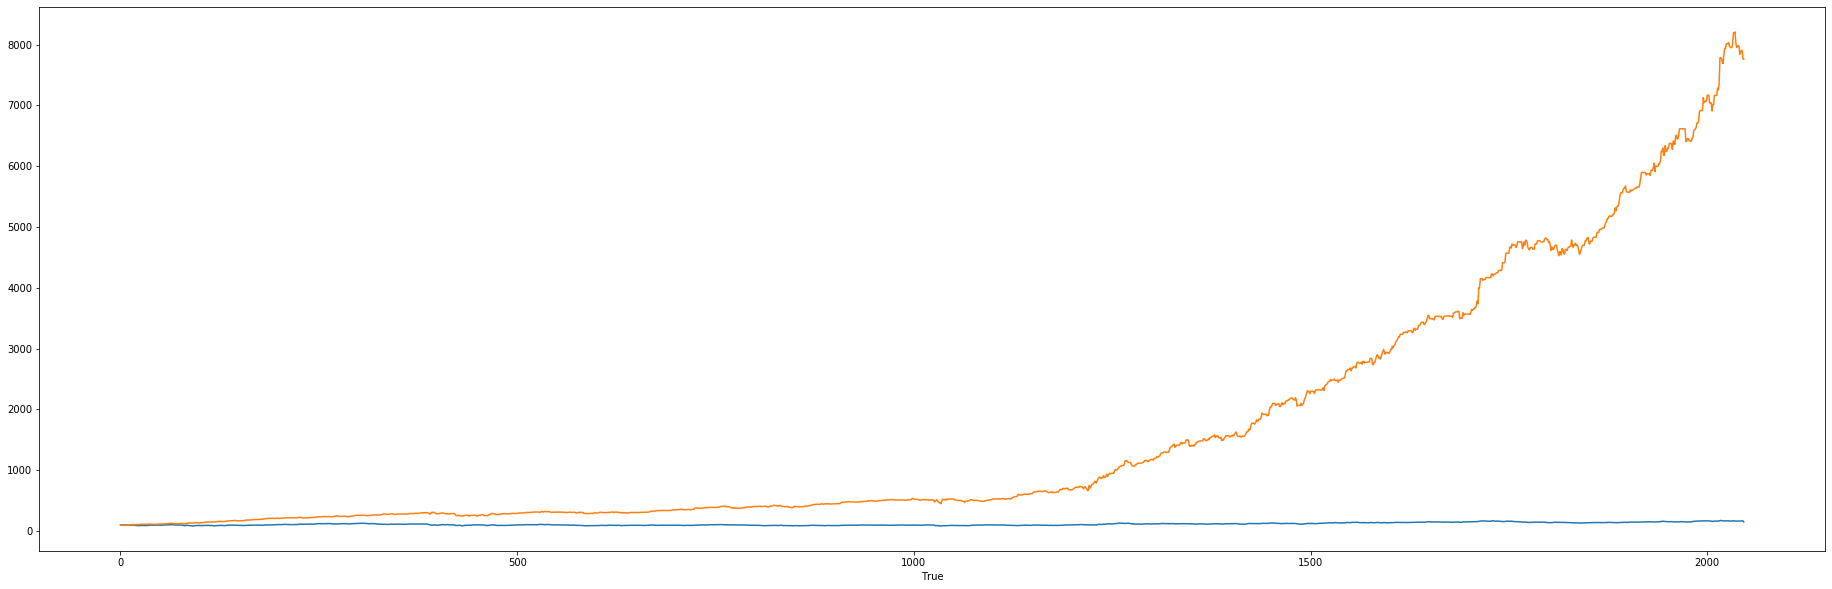

,index,Date,Proft1000,GAZP,GMKN,LKOH,ROSN,SBER,VTBR,GAZP_pr,GMKN_pr,LKOH_pr,ROSN_pr,SBER_pr,VTBR_pr,mean,equity,equity_my
0,0,2010-01-11,0.102623,194.500000,4695.399902,1750.979980,271.700012,86.690002,0.07260,7.044581,10.633059,3.727351,8.247017,5.965047,4.310343,6.654566,100.000000,100.000000
1,1,2010-01-12,-2.464419,191.800003,4640.060059,1719.819946,266.519989,85.000000,0.07270,-1.388173,-1.178597,-1.779577,-1.906523,-1.949478,0.137742,-1.344101,98.655899,97.535581
2,2,2010-01-13,1.973140,189.300003,4654.140137,1709.439941,267.540009,86.610001,0.07440,-1.303441,0.303446,-0.603552,0.382718,1.894118,2.338375,0.501944,99.151097,99.460095
3,1317,2010-01-14,0.000000,190.830002,4892.939941,1726.800049,268.000000,87.550003,0.07430,0.808240,5.130911,1.015544,0.171934,1.085328,-0.134410,1.346258,100.485926,99.460095
4,1318,2010-01-15,0.000000,187.860001,4884.620117,1731.949951,268.500000,88.150002,0.07460,-1.556360,-0.170037,0.298234,0.186567,0.685321,0.403775,-0.025417,100.460386,99.460095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,1314,2018-04-03,0.484138,141.130005,10830.000000,3951.000000,313.250000,251.600006,0.05230,0.577250,0.277778,-0.113766,1.359007,0.644026,2.268283,0.835430,164.834329,7875.559172
2043,1315,2018-04-04,0.363264,140.179993,10735.000000,3939.000000,319.600006,255.690002,0.05237,-0.673147,-0.877193,-0.303721,2.027137,1.625595,0.133847,0.322086,165.365238,7904.168226
2044,2045,2018-04-05,0.000000,140.500000,10744.000000,3990.000000,322.649994,262.000000,0.05395,0.228283,0.083838,1.294745,0.954314,2.467831,3.016994,1.341001,167.582787,7904.168226
2045,1316,2018-04-06,-1.807610,141.500000,10733.000000,3939.000000,319.600006,256.760010,0.05540,0.711744,-0.102383,-1.278195,-0.945293,-1.999996,2.687670,-0.154409,167.324024,7761.291718


In [1061]:
plot

,,2proba,2proba_Pro_Morni,2proba_Profi_GEP,2proba_Proft1000,2proba_Proft1300,2proba_Proft1830,2proba_ProftLaBa,Cl/max_day,Cl/min_day,Min10,...,Proft1000,Proft1300,Proft1830,ProftLaBa,Year,max_day-min_day,pr_comb,proba1,long,Date
date_time,Symbol,,,,,,,,,,,,,,,,,,,,,
2010-01-11 12:45:00,GAZP,0.564005,0.517941,0.503285,0.685405,0.491385,0.474284,0.711732,-0.035907,2.041882,7.264721,...,0.102623,-1.082607,-1.590555,-0.205230,2010,2.036943,-1.082607,2.362806,1,2010-01-11
2010-01-12 12:45:00,SBER,0.519282,0.448529,0.592395,0.588832,0.533091,0.477815,0.475029,-0.391836,1.206088,-0.299922,...,-2.464419,-0.902463,0.208261,-1.654518,2010,1.585092,-0.902463,2.074767,1,2010-01-12
2010-01-13 12:45:00,SBER,0.559074,0.460822,0.648506,0.649863,0.542276,0.530422,0.522553,-0.418557,1.843048,0.764708,...,1.973140,2.311729,2.218332,1.120840,2010,2.230010,2.311729,2.245114,1,2010-01-13
2010-01-18 12:45:00,GAZP,0.543294,0.501541,0.550778,0.606597,0.571061,0.519444,0.510345,-0.285786,0.969988,0.292773,...,0.408677,-0.164534,0.716518,1.056202,2010,1.247275,-0.164534,2.207447,1,2010-01-18
2010-01-19 12:45:00,LKOH,0.499383,0.443269,0.520803,0.560269,0.503132,0.461816,0.507010,-1.087579,0.347849,-0.974212,...,1.594332,2.302664,-0.063656,1.215278,2010,1.446180,2.302664,2.032228,1,2010-01-19
2010-01-20 12:45:00,VTBR,0.526645,0.467634,0.606171,0.567938,0.480148,0.506746,0.531234,-1.165803,1.462771,0.659632,...,-1.572747,-2.359110,-2.752301,-2.096992,2010,2.621237,-2.359110,2.086066,1,2010-01-20
2010-01-22 12:45:00,GAZP,0.528249,0.510766,0.585381,0.550421,0.521548,0.516434,0.484945,-1.349727,0.422759,-1.220177,...,-0.155098,0.637010,1.285109,0.537307,2010,1.789174,0.637010,2.073348,1,2010-01-22
2010-01-25 12:45:00,ROSN,0.550990,0.482377,0.612655,0.577218,0.553964,0.559550,0.520175,-1.045362,2.333456,1.018846,...,-2.104843,-3.930636,-4.927247,0.259117,2010,3.336653,-3.930636,2.210907,1,2010-01-25
2010-01-26 12:45:00,VTBR,0.520793,0.444123,0.587020,0.604490,0.509208,0.535758,0.444162,-1.264045,0.285301,-2.496534,...,0.711239,1.849218,2.418206,0.995738,2010,1.564717,1.849218,2.093618,1,2010-01-26


,Date,Proft1300
mean,2014-03-12 13:28:26.405431808,0.326493
count,1327,1327.000000


,Date,Proft1300
0,2010-01-11,-1.082607
1,2010-01-12,-0.902463
2,2010-01-13,2.311729
3,2010-01-18,-0.164534
4,2010-01-19,2.302664
5,2010-01-20,-2.359110
6,2010-01-22,0.637010
7,2010-01-25,-3.930636
8,2010-01-26,1.849218
9,2010-01-27,4.106548


,Date,Proft1000
mean,2014-03-12 13:28:26.405431808,0.230742
count,1327,1327.000000


,Date,Proft1000
0,2010-01-11,-0.149093
1,2010-01-12,-1.180235
2,2010-01-13,1.788444
3,2010-01-18,0.408677
4,2010-01-19,1.594332
5,2010-01-20,-1.572747
6,2010-01-22,-0.155098
7,2010-01-25,-1.504016
8,2010-01-26,-0.232474
9,2010-01-27,4.658160


In [929]:
%run library.ipynb

#УБРАТЬ СДВОЕННОСТИ DEF +комбинаторика (МИН ПРОБА БОЛЬШЕ 0,55 ДЛЯ 4 ТАРГЕТОВ)
tresh_comb = 0.55
bezdouble(tresh_comb)


(1943, 14)

(1327, 14)

(1327, 15)

mean                                                    \
          Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830 ProftLaBa   
date_time                                                               
2010       0.046442  0.181375  0.476311  0.520274  0.703147  0.294651   
2011      -0.051031  0.019313  0.170475  0.117060 -0.029960  0.148097   
2012      -0.032491  0.124865  0.200648  0.166791  0.261991  0.075771   
2013      -0.073316  0.139301  0.199965  0.127393  0.128628  0.060720   
2014       0.003987  0.076177  0.113340  0.118548 -0.000587  0.034320   
2015       0.078341  0.141807  0.418918  0.500032  0.436158  0.276138   
2016       0.017989  0.116498  0.383204  0.400570  0.449314  0.266541   
2017      -0.066005  0.010876  0.241280  0.175015  0.223215  0.230959   
2018      -0.064564  0.052865  0.457958  0.394456  0.282249  0.404334   
All       -0.009769  0.099520  0.282121  0.272159  0.271324  0.181737   

                        count                                          \
            pr_comb Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830   
date_time                                                               
2010       0.520274       152       152       152       152       152   
2011       0.117060       157       157       157       157       157   
2012       0.166791       155       155       155       155       155   
2013       0.127393       151       151       151       151       151   
2014       0.118548       171       171       171       171       171   
2015       0.500032       174       174       174       174       174   
2016       0.400570       166       166       166       166       166   
2017       0.175015       157       157       157       157       157   
2018       0.394456        44        44        44        44        44   
All        0.272159      1327      1327      1327      1327      1327   

                             
          ProftLaBa pr_comb  
date_time                    
2010            152     152  
2011            157     157  
2012            155     155  
2013            151     151  
2014            171     171  
2015            174     174  
2016            166     166  
2017            157     157  
2018             44      44  
All            1327    1327

In [928]:
plot

In [1025]:
%%time

#СОРТИРОВКА ПО ВЕРОЯТНОСТИ
proba_all  = ['2proba_Proft1000', '2proba_Proft1300', '2proba_Proft1830', '2proba_ProftLaBa']
tresh  = 0.55
time_  = datetime.time(12,45,0)
con = pd.DataFrame()

sort_var(proba_all, tresh, time_)


mean                      count            \
          2proba_Proft1000 Proft1000 2proba_Proft1000 Proft1000   
date_time                                                         
2010              0.605835  0.562417              152       152   
2011              0.604819  0.151819              157       157   
2012              0.588547  0.198954              155       155   
2013              0.585394  0.192039              151       151   
2014              0.599083  0.275577              171       171   
2015              0.601252  0.593587              174       174   
2016              0.593085  0.412969              166       166   
2017              0.590756  0.271474              157       157   
2018              0.603477  0.445696               44        44   
All               0.596442  0.339376             1327      1327   

                      mean                      count            
          2proba_Proft1000 Proft1000 2proba_Proft1000 Proft1000  
date_time                                                        
2010              0.577132  0.434181              152       152  
2011              0.573554  0.081225              157       157  
2012              0.569736  0.213484              155       155  
2013              0.569442  0.202002              151       151  
2014              0.572814 -0.015229              171       171  
2015              0.573967  0.325963              174       174  
2016              0.570805  0.357890              166       166  
2017              0.575347  0.204967              157       157  
2018              0.573260  0.412536               44        44  
All               0.572867  0.230742             1327      1327

mean                      count            \
          2proba_Proft1300 Proft1300 2proba_Proft1300 Proft1300   
date_time                                                         
2010              0.590549  0.853090               92        92   
2011              0.594263  0.147708              105       105   
2012              0.586295  0.455653               90        90   
2013              0.583294  0.149634               91        91   
2014              0.588283  0.685168              105       105   
2015              0.589225  0.825111              136       136   
2016              0.589192  0.718705              115       115   
2017              0.587039  0.430432              107       107   
2018              0.599273  0.464558               31        31   
All               0.589021  0.545740              872       872   

                      mean                      count            
          2proba_Proft1300 Proft1300 2proba_Proft1300 Proft1300  
date_time                                                        
2010              0.577299  0.890710               92        92  
2011              0.575260  0.109713              105       105  
2012              0.578686  0.287731               90        90  
2013              0.573966  0.045340               91        91  
2014              0.575264  0.490126              105       105  
2015              0.573608  0.941373              136       136  
2016              0.574637  0.575894              115       115  
2017              0.573678  0.217026              107       107  
2018              0.584218  0.424797               31        31  
All               0.575479  0.465132              872       872

mean                      count            \
          2proba_Proft1830 Proft1830 2proba_Proft1830 Proft1830   
date_time                                                         
2010              0.599225  0.670220               90        90   
2011              0.592646 -0.078000               84        84   
2012              0.593280  0.857073               67        67   
2013              0.587074  0.710023               68        68   
2014              0.597679  0.740703               73        73   
2015              0.590214  1.315042              113       113   
2016              0.604718  0.702744               91        91   
2017              0.594929  0.564520               83        83   
2018              0.611909  1.168280               20        20   
All               0.595580  0.720341              689       689   

                      mean                      count            
          2proba_Proft1830 Proft1830 2proba_Proft1830 Proft1830  
date_time                                                        
2010              0.580115  0.673409               90        90  
2011              0.574951  0.190953               84        84  
2012              0.579563  0.974160               67        67  
2013              0.579485  0.590738               68        68  
2014              0.580299  0.942887               73        73  
2015              0.577892  0.881681              113       113  
2016              0.591047  0.680088               91        91  
2017              0.585339  0.698406               83        83  
2018              0.588436  1.046293               20        20  
All               0.581339  0.713103              689       689

mean                      count            \
          2proba_ProftLaBa ProftLaBa 2proba_ProftLaBa ProftLaBa   
date_time                                                         
2010              0.609280  0.682612               71        71   
2011              0.599152  0.299228               63        63   
2012              0.581364  0.625271               62        62   
2013              0.585861  0.284390               56        56   
2014              0.588915  0.328254               72        72   
2015              0.595007  0.250269               84        84   
2016              0.600013  0.427522               92        92   
2017              0.617876  0.515839               80        80   
2018              0.601181  0.423645               19        19   
All               0.598154  0.426235              599       599   

                      mean                      count            
          2proba_ProftLaBa ProftLaBa 2proba_ProftLaBa ProftLaBa  
date_time                                                        
2010              0.585522  0.602939               71        71  
2011              0.578353  0.285637               63        63  
2012              0.569924  0.428161               62        62  
2013              0.575351  0.220107               56        56  
2014              0.578542  0.397049               72        72  
2015              0.580436  0.187421               84        84  
2016              0.581452  0.367925               92        92  
2017              0.604741  0.435152               80        80  
2018              0.587618  0.482772               19        19  
All               0.582659  0.370352              599       599

Wall time: 889 ms


In [849]:
#БЕЗ КОМБИНАТОРИКА И СДВОЕННОСТИ. СРедняя

tresh  = 0.55
from__ = datetime.time(12,45,0)
ye     = 2010
ff_all = ['Proft1000','Proft1300','Proft1830','ProftLaBa']

mean(tresh, from__, ye , ff_all)


datetime.time(12, 45)

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1000,Proft1000,Proft1000,Proft1000,Proft1000,Proft1000
date_time,,,,,,
2010,0.533576,348,0.476311,152,0.476311,152
2011,0.196579,366,0.170475,157,0.170475,157
2012,0.258317,297,0.200648,155,0.200648,155
2013,0.262047,273,0.199965,151,0.199965,151
2014,0.314787,338,0.113340,171,0.113340,171
2015,0.435697,351,0.418918,174,0.418918,174
2016,0.496901,315,0.383204,166,0.383204,166
2017,0.238264,273,0.241280,157,0.241280,157


datetime.time(12, 45)

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300
date_time,,,,,,
2010,0.888562,142,0.857193,92,0.857193,92
2011,0.293964,182,0.120970,105,0.120970,105
2012,0.507559,123,0.344005,90,0.344005,90
2013,0.120830,121,0.088291,91,0.088291,91
2014,0.717930,163,0.618346,105,0.618346,105
2015,0.908305,207,0.843174,136,0.843174,136
2016,0.823133,172,0.643789,115,0.643789,115
2017,0.378055,158,0.324948,107,0.324948,107


datetime.time(12, 45)

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1830,Proft1830,Proft1830,Proft1830,Proft1830,Proft1830
date_time,,,,,,
2010,0.976146,137,0.686393,90,0.686393,90
2011,0.409469,140,0.103879,84,0.103879,84
2012,1.028905,99,0.904708,67,0.904708,67
2013,0.722059,92,0.626319,68,0.626319,68
2014,0.843271,110,0.848944,73,0.848944,73
2015,1.363029,164,1.112830,113,1.112830,113
2016,0.765780,125,0.661664,91,0.661664,91
2017,0.688168,108,0.623269,83,0.623269,83


datetime.time(12, 45)

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa
date_time,,,,,,
2010,0.616400,120,0.648607,71,0.648607,71
2011,0.335071,107,0.251873,63,0.251873,63
2012,0.624155,82,0.517135,62,0.517135,62
2013,0.271606,72,0.249087,56,0.249087,56
2014,0.460070,91,0.348598,72,0.348598,72
2015,0.239985,133,0.244777,84,0.244777,84
2016,0.433936,132,0.402183,92,0.402183,92
2017,0.500283,102,0.491496,80,0.491496,80


In [838]:
pd.options.display.max_rows=2000
all = ['Target',] 
result_(0.525,0.55)

count                   mean                  count  \
          Profit_carrent Target_ Profit_carrent Target_ Profit_carrent   
Pro_Morni           47.0    47.0           0.52    0.64            NaN   
Profi_GEP         1436.0  1436.0           0.35    0.63            NaN   
Proft1000          878.0   878.0           1.15    0.64            NaN   
Proft1830          596.0   596.0           1.01    0.62           19.0   
All               2957.0  2957.0           0.72    0.63           91.0   
ProftLaBa            NaN     NaN            NaN     NaN           72.0   

                            mean          
          Target_ Profit_carrent Target_  
Pro_Morni     NaN            NaN     NaN  
Profi_GEP     NaN            NaN     NaN  
Proft1000     NaN            NaN     NaN  
Proft1830    19.0          -0.72    0.11  
All          91.0          -0.64    0.27  
ProftLaBa    72.0          -0.61    0.32

'10:50:00'

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1000,Proft1000,Proft1000,Proft1000,Proft1000,Proft1000
date_time,,,,,,
2010,0.438372,1042,0.148615,154,0.370519,154
2011,0.282417,1066,-0.009287,156,0.174197,156
2012,0.108154,640,0.032892,110,0.236206,110
2013,0.251704,419,0.022456,108,0.037544,108
2014,0.380818,605,0.239135,127,0.347854,127
2015,0.322731,963,0.042846,163,0.271163,163
2016,0.176716,847,0.196930,130,0.329923,130
2017,0.181506,471,0.148091,120,0.211421,120


'10:50:00'

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300
date_time,,,,,,
2010,0.543275,525,0.454526,119,0.546181,119
2011,0.299136,755,-0.017311,150,0.128867,150
2012,0.401496,252,0.002332,71,0.167308,71
2013,0.410656,204,0.355541,55,0.386499,55
2014,0.556626,539,0.391179,122,0.504217,122
2015,0.602576,732,0.371734,141,0.517236,141
2016,0.304366,495,0.312815,101,0.410920,101
2017,0.150145,307,0.041816,123,0.061890,123


'10:50:00'

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1830,Proft1830,Proft1830,Proft1830,Proft1830,Proft1830
date_time,,,,,,
2010,1.341995,281,0.769559,101,0.831913,101
2011,0.590223,305,-0.084693,109,0.048289,109
2012,0.599269,172,0.063258,36,0.220563,36
2013,0.589000,123,0.683328,32,0.755656,32
2014,0.384587,264,0.738070,58,1.008725,58
2015,0.684967,434,0.371449,82,0.472757,82
2016,0.730677,255,0.497144,62,0.550276,62
2017,0.316065,105,0.127289,37,0.369521,37


'10:50:00'

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa
date_time,,,,,,
2010,0.356710,852,0.021984,116,0.224629,116
2011,0.090665,741,-0.059866,100,0.067721,100
2012,0.294858,457,0.010239,76,0.218980,76
2013,0.139780,318,-0.057010,69,-0.013031,69
2014,0.035945,609,0.095418,101,0.376835,101
2015,0.046604,891,-0.151817,131,0.082805,131
2016,0.245420,477,0.163589,85,0.264302,85
2017,0.124364,290,0.032417,76,0.168957,76


In [16]:
#сравниваем pivo3 and pivo3
tresh_comb = 0.55
tresh      = 0.55

pivo3_00 = pd.pivot_table(matrix_year[matrix_year['2proba'] > tresh],
                      index=['Year'],
                       values=['Profit_carrent'],
                       columns=['Target'],
                       aggfunc=['mean', 'count'],
                       margins=True
                      )
display(pivo3_00)
pivo3_r = pivo3[pivo3['Date'].dt.year.isin([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])] #убрали годы
pivo3_55 = pd.pivot_table(pivo3_r[pivo3_r[['2proba_Proft1000','2proba_Proft1300','2proba_Proft1830','2proba_ProftLaBa']].min(axis=1) > tresh_comb], 
                          index = 'Year', values = ['Pro_Morni','Profi_GEP','Proft1000','Proft1300','Proft1830','ProftLaBa'], aggfunc=['mean', 'count'],
                          margins=True
                         )                    
pivo3_55

mean                                                    \
       Profit_carrent                                                     
Target      Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830 ProftLaBa   
Year                                                                      
2013         0.221933  0.039703  0.003312 -0.072210 -0.081161  0.070014   
2014        -0.153860 -0.006602  0.150997  0.288552  0.971968  0.117365   
2015         0.420470  0.127889  0.257426  0.431788  0.265768  0.040081   
2016         0.226690  0.082537  0.291916  0.381296  0.567922  0.238870   
2017        -1.012785  0.055967  0.212954  0.109347  0.361057  0.085000   
2018        -0.409289  0.137041  0.271818  0.461695  0.855652  0.172516   
2019              NaN  0.132948  0.181958  0.140468  0.181860  0.036395   
2020         0.106161  0.499292  0.359150  0.543712  0.015755  0.046192   
All          0.026521  0.082258  0.192117  0.304096  0.310668  0.093282   

                          count                                          \
                 Profit_carrent                                           
Target       All      Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830   
Year                                                                      
2013    0.023239          294.0    6216.0    1866.0     727.0     812.0   
2014    0.064220          348.0    6615.0    1076.0     525.0     325.0   
2015    0.160454           41.0    6062.0     719.0     510.0     531.0   
2016    0.200847           63.0    2992.0     804.0     780.0     348.0   
2017    0.102109           14.0    1854.0     468.0     478.0     194.0   
2018    0.293485           31.0    1584.0    1161.0     834.0     366.0   
2019    0.138258            NaN     817.0     440.0     371.0     156.0   
2020    0.342058           58.0    1188.0    1027.0     746.0     514.0   
All     0.138171          849.0   27328.0    7561.0    4971.0    3246.0   

                         
                         
Target ProftLaBa    All  
Year                     
2013       654.0  10569  
2014       719.0   9608  
2015       642.0   8505  
2016       280.0   5267  
2017       258.0   3266  
2018       424.0   4400  
2019       221.0   2005  
2020       586.0   4119  
All       3784.0  47739

mean                                                       count  \
     Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830 ProftLaBa Pro_Morni   
Year                                                                         
2013 -0.084914  0.078993  0.251480  0.164307  0.222598  0.174426        43   
2014 -0.062044  0.122112  0.592509  0.521466  1.135769  0.458666        63   
2015  0.259475  0.267623 -0.016546  0.244914 -0.015328 -0.284305       176   
2016  0.102474  0.120748  0.334622  0.433307  0.674179  0.210498       118   
2017 -0.034213  0.068472  0.146437  0.113588  0.256321  0.079754       101   
2018  0.039574  0.291856  0.393046  0.436970  0.749776  0.108499       184   
2019 -0.242216  0.267918  0.247517  0.000777  0.123314 -0.021263        83   
2020 -0.301899  0.441872  0.509537  0.218576 -0.158225  0.054835       193   
All  -0.025333  0.250338  0.302508  0.279165  0.313762  0.049984       961   

                                                        
     Profi_GEP Proft1000 Proft1300 Proft1830 ProftLaBa  
Year                                                    
2013        43        43        43        43        43  
2014        63        63        63        63        63  
2015       176       176       176       176       176  
2016       118       118       118       118       118  
2017       101       101       101       101       101  
2018       184       184       184       184       184  
2019        83        83        83        83        83  
2020       193       193       193       193       193  
All        961       961       961       961       961

In [189]:
pivo3

,Symbol,Date,2proba_Pro_Morni,2proba_Profi_GEP,2proba_Proft1000,2proba_Proft1300,2proba_Proft1830,2proba_ProftLaBa,2proba,Pro_Morni,Profi_GEP,Proft1000,Proft1300,Proft1830,ProftLaBa,Year
0,GAZP,2007-01-09 10:50:00,0.395738,0.613336,0.526596,0.539945,0.540665,0.462492,0.513129,0.203359,-0.512767,-2.973295,-2.775982,-0.741623,-2.473210,2007
1,GAZP,2007-01-09 11:50:00,0.468902,0.598272,0.582430,0.551400,0.566837,0.539295,0.551189,0.203359,-0.512767,-3.742828,-3.547081,-1.528856,-3.246709,2007
2,GAZP,2007-01-09 12:50:00,0.472617,0.565475,0.528165,0.458449,0.553901,0.489350,0.511326,0.203359,-0.512767,-2.887398,-2.689911,-0.653751,-2.386871,2007
3,GAZP,2007-01-09 13:50:00,0.426713,0.545857,0.458733,0.402182,0.528872,0.512750,0.479185,0.203359,-0.512767,-2.658703,-2.460751,-0.419795,-2.156997,2007
4,GAZP,2007-01-09 14:50:00,0.383038,0.535361,0.484571,0.432438,0.523385,0.460851,0.469941,0.203359,-0.512767,-2.057005,-1.857830,0.195742,-1.552198,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18855,VTBR,2008-12-30 12:50:00,0.507155,0.512669,0.508013,0.477876,0.500733,0.478646,0.497515,4.504505,-1.479290,-0.597015,3.880597,1.492537,0.895522,2008
18856,VTBR,2008-12-30 13:50:00,0.518604,0.523268,0.514906,0.513207,0.500021,0.483106,0.508852,4.504505,-1.479290,-0.892857,3.571429,1.190476,0.595238,2008
18857,VTBR,2008-12-30 14:50:00,0.511704,0.523566,0.528291,0.524974,0.498319,0.504399,0.515209,4.504505,-1.479290,-0.892857,3.571429,1.190476,0.595238,2008
18858,VTBR,2008-12-30 15:50:00,0.472149,0.553458,0.564069,0.551498,0.507597,0.519710,0.528080,4.504505,-1.479290,-1.769912,2.654867,0.294985,-0.294985,2008


In [17]:
# ФУНКЦИЯ КОТОАРЯ РАБОТАЕТ ТОЛЬКО С  matrix_year ОЛЬШЕ НИЧЕГО ЕЙ НЕ НУЖНО

#переменные
na_re = 4 #число  совпаlений
#profit_anal = 'Proft1000' # какую профит смотрим СМОТРИМ ВСЕ В ЦИКЛЕ
tresh = 0.55 #порог



In [18]:
pivo1 = pd.pivot_table(matrix_year[matrix_year['2proba'] > tresh],
                      index=['date_time'],
                       values=['Profit_carrent'],
                       columns=['Target'],
                       aggfunc=['mean','count'],
                      # margins=True
                      )
display(pivo1.head(10))
pivo1.columns = ['Pro_Morni','Profi_GEP','Proft1000','Proft1300','Proft1830','ProftLaBa',   'C_Pro_Morni','C_Profi_GEP','C_Proft1000','C_Proft1300','C_Proft1830','C_ProftLaBa',]
#pivo1.columns = ['Proft1000','Proft1300','ProftLaBa',   'C_Proft1000','C_Proft1300','C_ProftLaBa',]

pivo1['namber'] = pivo1[['Proft1000','Proft1300','Proft1830','ProftLaBa']].apply(lambda x: x.notnull().sum(), axis='columns') # берем только таргеты 4 без гэпа и морнинга
display(pivo1.head(10))


mean                                          \
                    Profit_carrent                                           
Target                   Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830   
date_time                                                                    
2013-01-08 10:50:00       0.544743       NaN       NaN  0.315247  0.032649   
2013-01-08 11:50:00       0.711864       NaN  0.049823  0.922982       NaN   
2013-01-08 12:50:00            NaN       NaN  0.337216  0.562027  0.378091   
2013-01-08 13:50:00            NaN       NaN -0.140313  0.469627 -0.201460   
2013-01-08 14:50:00            NaN       NaN -0.143936  0.077111  0.224467   
2013-01-08 15:50:00            NaN -0.933155 -1.234248       NaN       NaN   
2013-01-08 16:50:00            NaN -0.933155 -0.341300  0.071182       NaN   
2013-01-09 10:50:00            NaN -0.013542       NaN       NaN       NaN   
2013-01-09 11:50:00            NaN  0.249486  0.377744       NaN       NaN   
2013-01-09 12:50:00            NaN -0.018606       NaN       NaN       NaN   

                                       count                                \
                              Profit_carrent                                 
Target              ProftLaBa      Pro_Morni Profi_GEP Proft1000 Proft1300   
date_time                                                                    
2013-01-08 10:50:00  0.222249            4.0       NaN       NaN       2.0   
2013-01-08 11:50:00  0.178347            1.0       NaN       2.0       1.0   
2013-01-08 12:50:00  0.225591            NaN       NaN       1.0       1.0   
2013-01-08 13:50:00  0.050045            NaN       NaN       2.0       1.0   
2013-01-08 14:50:00 -0.262490            NaN       NaN       2.0       2.0   
2013-01-08 15:50:00 -0.142114            NaN       1.0       1.0       NaN   
2013-01-08 16:50:00  0.010005            NaN       1.0       2.0       1.0   
2013-01-09 10:50:00       NaN            NaN       5.0       NaN       NaN   
2013-01-09 11:50:00       NaN            NaN       6.0       1.0       NaN   
2013-01-09 12:50:00       NaN            NaN       4.0       NaN       NaN   

                                         
                                         
Target              Proft1830 ProftLaBa  
date_time                                
2013-01-08 10:50:00       2.0       2.0  
2013-01-08 11:50:00       NaN       2.0  
2013-01-08 12:50:00       1.0       4.0  
2013-01-08 13:50:00       2.0       3.0  
2013-01-08 14:50:00       1.0       6.0  
2013-01-08 15:50:00       NaN       4.0  
2013-01-08 16:50:00       NaN       3.0  
2013-01-09 10:50:00       NaN       NaN  
2013-01-09 11:50:00       NaN       NaN  
2013-01-09 12:50:00       NaN       NaN

,Pro_Morni,Profi_GEP,Proft1000,Proft1300,Proft1830,ProftLaBa,C_Pro_Morni,C_Profi_GEP,C_Proft1000,C_Proft1300,C_Proft1830,C_ProftLaBa,namber
date_time,,,,,,,,,,,,,
2013-01-08 10:50:00,0.544743,NaN,NaN,0.315247,0.032649,0.222249,4.0,NaN,NaN,2.0,2.0,2.0,3
2013-01-08 11:50:00,0.711864,NaN,0.049823,0.922982,NaN,0.178347,1.0,NaN,2.0,1.0,NaN,2.0,3
2013-01-08 12:50:00,NaN,NaN,0.337216,0.562027,0.378091,0.225591,NaN,NaN,1.0,1.0,1.0,4.0,4
2013-01-08 13:50:00,NaN,NaN,-0.140313,0.469627,-0.201460,0.050045,NaN,NaN,2.0,1.0,2.0,3.0,4
2013-01-08 14:50:00,NaN,NaN,-0.143936,0.077111,0.224467,-0.262490,NaN,NaN,2.0,2.0,1.0,6.0,4
2013-01-08 15:50:00,NaN,-0.933155,-1.234248,NaN,NaN,-0.142114,NaN,1.0,1.0,NaN,NaN,4.0,2
2013-01-08 16:50:00,NaN,-0.933155,-0.341300,0.071182,NaN,0.010005,NaN,1.0,2.0,1.0,NaN,3.0,3
2013-01-09 10:50:00,NaN,-0.013542,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,0
2013-01-09 11:50:00,NaN,0.249486,0.377744,NaN,NaN,NaN,NaN,6.0,1.0,NaN,NaN,NaN,1


In [19]:
pivo1.describe()
pivo2 = pivo1[pivo1['namber'] >= na_re]
k1 = []
for oo in range(len(pivo2)):
    if pivo2.index[oo].date() != pivo2.index[oo-1].date():
        k = 1
    else:
        k+=1
    k1.append(k)
k1        
pivo2['long'] = k1

pivo2
pivo3 = pivo2[pivo2['long'] == 1] #первый на дню
for ll in ['Pro_Morni','Profi_GEP','Proft1000','Proft1300','Proft1830','ProftLaBa']:
    pivo4 = pd.pivot_table(pivo3,
                          index = pivo3.index.year,
                           values=ll,
                           aggfunc=['mean', 'count', 'min', 'max'],
                           margins=True
                          )  


    display(pivo4)

,mean,count,min,max
,Pro_Morni,Pro_Morni,Pro_Morni,Pro_Morni
2013,-0.151517,8,-1.588776,1.673374
2014,0.085346,26,-3.004604,3.182822
2016,0.917915,2,0.073099,1.762731
2020,2.806122,1,2.806122,2.806122
All,0.152671,37,-3.004604,3.182822
2015,NaN,0,NaN,NaN
2017,NaN,0,NaN,NaN
2018,NaN,0,NaN,NaN
2019,NaN,0,NaN,NaN


,mean,count,min,max
,Profi_GEP,Profi_GEP,Profi_GEP,Profi_GEP
date_time,,,,
2013,0.089720,33,-1.490674,1.449119
2014,0.220078,51,-3.318145,3.153635
2015,0.186609,89,-1.658631,1.766192
2016,-0.017190,54,-3.728829,2.426628
2017,0.221883,43,-0.789376,1.653536
2018,0.227963,64,-3.519856,2.755452
2019,0.249801,43,-1.004855,1.902039
2020,0.203353,59,-9.701711,5.379607


,mean,count,min,max
,Proft1000,Proft1000,Proft1000,Proft1000
date_time,,,,
2013,0.046302,43,-2.016528,2.682682
2014,0.248693,59,-9.464504,7.074560
2015,0.232345,91,-4.124281,5.391246
2016,0.306787,56,-4.261636,3.595708
2017,0.223954,51,-3.057516,2.449694
2018,0.463755,69,-7.089422,4.141462
2019,0.206070,48,-3.020797,3.869262
2020,-0.019549,65,-11.996872,13.047309


,mean,count,min,max
,Proft1300,Proft1300,Proft1300,Proft1300
date_time,,,,
2013,0.173158,43,-3.095238,4.153570
2014,0.592993,59,-8.879282,19.245142
2015,0.292177,91,-6.141367,7.688832
2016,0.355098,56,-3.334926,4.753863
2017,0.239735,51,-4.703870,3.656809
2018,0.588141,69,-10.200760,8.001873
2019,0.013981,48,-3.029040,2.979275
2020,0.157894,65,-11.823989,17.402873


,mean,count,min,max
,Proft1830,Proft1830,Proft1830,Proft1830
date_time,,,,
2013,-0.240496,43,-8.423493,4.100812
2014,0.948807,59,-3.526871,17.806428
2015,0.019670,91,-6.701429,6.281883
2016,0.618338,56,-3.744947,6.406185
2017,0.322262,51,-3.819137,4.955642
2018,0.610348,69,-8.844276,6.553540
2019,-0.023195,48,-3.185397,2.582765
2020,-0.185373,65,-15.047554,11.813594


,mean,count,min,max
,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa
date_time,,,,
2013,-0.010467,43,-1.687052,3.053435
2014,0.240309,59,-5.104799,4.993723
2015,-0.057218,91,-3.639540,3.447693
2016,0.365460,56,-1.823570,2.806324
2017,0.087976,51,-3.789279,1.757114
2018,0.176102,69,-5.967293,5.347178
2019,-0.003540,48,-2.230742,3.124249
2020,0.027177,65,-5.033238,11.322070


,mean,count
,Proft1000,Proft1000
10:45:00,2.740797,5
11:45:00,0.561842,5
12:45:00,0.632109,28
13:45:00,0.471562,105
All,0.585498,143


,mean,count
,Proft1300,Proft1300
10:45:00,2.614796,5
11:45:00,0.363369,5
12:45:00,0.706022,28
13:45:00,0.571994,105
All,0.662369,143


,mean,count
,Proft1830,Proft1830
10:45:00,3.314291,5
11:45:00,0.255331,5
12:45:00,0.510192,28
13:45:00,0.545417,105
All,0.625191,143


,mean,count
,ProftLaBa,ProftLaBa
10:45:00,2.543375,5
11:45:00,0.173363,5
12:45:00,0.480153,28
13:45:00,0.573578,105
All,0.610166,143


,mean,count
,Proft1000,Proft1000
date_time,,
2010,0.516307,40
2011,0.396233,62
2012,0.458228,23
2013,0.583476,19
2014,0.560509,43
2015,0.334464,63
2016,0.573455,39
2017,0.276000,38


,mean,count
,Proft1300,Proft1300
date_time,,
2010,0.559504,40
2011,0.337822,62
2012,0.504631,23
2013,0.459407,19
2014,0.922171,43
2015,0.348676,63
2016,0.682813,39
2017,0.280488,38


,mean,count
,Proft1830,Proft1830
date_time,,
2010,0.567953,40
2011,0.561916,62
2012,0.579721,23
2013,0.455690,19
2014,0.802708,43
2015,0.353599,63
2016,0.785053,39
2017,0.275375,38


,mean,count
,ProftLaBa,ProftLaBa
date_time,,
2010,0.487267,40
2011,0.458407,62
2012,0.475487,23
2013,0.495439,19
2014,0.788865,43
2015,0.447673,63
2016,0.646613,39
2017,0.297090,38


count                   mean          \
                   Profit_carrent Target_ Profit_carrent Target_   
Target    from_                                                    
Proft1000 10:45:00             45      45           0.87    0.44   
          11:45:00             79      79           0.42    0.52   
          12:45:00             58      58           0.38    0.57   
          13:45:00            142     142           0.48    0.50   
          14:45:00             21      21          -0.24    0.48   
          15:45:00            162     162           0.45    0.46   
          16:45:00             18      18          -0.34    0.50   
Proft1300 10:45:00             45      45           0.94    0.44   
          11:45:00             79      79           0.56    0.52   
          12:45:00             58      58           0.11    0.57   
          13:45:00            142     142           0.68    0.50   
          14:45:00             21      21           0.10    0.48   
          15:45:00            162     162           0.48    0.46   
          16:45:00             18      18          -0.32    0.50   
ProftLaBa 10:45:00             45      45           0.04    0.44   
          11:45:00             79      79           0.32    0.52   
          12:45:00             58      58          -0.14    0.57   
          13:45:00            142     142           0.10    0.50   
          14:45:00             21      21          -0.71    0.48   
          15:45:00            162     162           0.19    0.46   
          16:45:00             18      18          -0.38    0.50   
All                          1575    1575           0.34    0.49   

                            count                   mean          
                   Profit_carrent Target_ Profit_carrent Target_  
Target    from_                                                   
Proft1000 10:45:00          12307   12307           0.02    0.39  
          11:45:00          12273   12273           0.03    0.39  
          12:45:00          12294   12294           0.04    0.39  
          13:45:00          12210   12210           0.04    0.39  
          14:45:00          12331   12331           0.05    0.39  
          15:45:00          12190   12190           0.04    0.38  
          16:45:00          12334   12334           0.05    0.38  
Proft1300 10:45:00          12307   12307           0.01    0.39  
          11:45:00          12273   12273           0.02    0.39  
          12:45:00          12294   12294           0.03    0.39  
          13:45:00          12210   12210           0.03    0.39  
          14:45:00          12331   12331           0.03    0.39  
          15:45:00          12190   12190           0.02    0.38  
          16:45:00          12334   12334           0.03    0.38  
ProftLaBa 10:45:00          12307   12307           0.01    0.39  
          11:45:00          12273   12273           0.02    0.39  
          12:45:00          12294   12294           0.03    0.39  
          13:45:00          12210   12210           0.03    0.39  
          14:45:00          12331   12331           0.03    0.39  
          15:45:00          12190   12190           0.02    0.38  
          16:45:00          12334   12334           0.03    0.38  
All                        257817  257817           0.03    0.39

In [16]:
from_  = '10:45:00'
Target = 'Proft1300'
varP = 0.5
ss      = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)]
                         , values=['Profit_carrent'], index=['Date'], aggfunc=['mean', 'count'])

ss.columns = ['mean', 'count']
display(ss.shape)

from_  = '11:45:00'
#Target = 'Proft1000'

ss1      = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)]
                         , values=['Profit_carrent'], index=['Date'], aggfunc=['mean', 'count'])

ss1.columns = ['mean', 'count']
display(ss1.shape)

from_  = '11:45:00'
#Target = 'Proft1000'

ss2      = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)]
                         , values=['Profit_carrent'], index=['Date'], aggfunc=['mean', 'count'])

ss2.columns = ['mean', 'count']
display(ss2.shape)

all = pd.merge(ss,  ss1, on = 'Date', how='outer')
#display(all)
display(all.shape)
all = pd.merge(all, ss2, on = 'Date', how='outer')
all.sort_index(inplace=True)
display(all.shape)
all.columns = ['13:45:00mean', 'count','14:45:00mean', 'count','15:45:00mean', 'count',]

all['mean'] = all['13:45:00mean'].fillna(all['14:45:00mean']).fillna(all['15:45:00mean'])
all

all_pivo1    = pd.pivot_table(all, index=all.index.year, values=['13:45:00mean'], aggfunc=['mean', 'count'], margins=True)
all_pivo2    = pd.pivot_table(all, index=all.index.year, values=['14:45:00mean'], aggfunc=['mean', 'count'], margins=True)
all_pivo3    = pd.pivot_table(all, index=all.index.year, values=['15:45:00mean'], aggfunc=['mean', 'count'], margins=True)
all_pivo4    = pd.pivot_table(all, index=all.index.year, values=['mean']  , aggfunc=['mean', 'count'], margins=True)

all_pivo     = pd.concat([all_pivo1,all_pivo2,all_pivo3,all_pivo4], axis=1)
all_pivo.columns = ['13:45:00mean', 'count', '14:45:00mean', 'count','15:45:00mean', 'count','MEAN', 'COUNT',]

#all_pivo.sort_index(inplace=True)
all_pivo


(27, 2)

(25, 2)

(25, 2)

(38, 4)

(38, 6)

,13:45:00mean,count,14:45:00mean,count,15:45:00mean,count,MEAN,COUNT
2010,0.932213,7,3.386022,3,3.386022,3,1.016830,8
2011,0.532963,9,1.977596,8,1.977596,8,0.604435,13
2012,5.604518,1,2.020839,1,2.020839,1,5.604518,1
2013,-1.223559,1,-0.272194,1,-0.272194,1,-1.223559,1
2014,1.129706,5,1.103454,10,1.103454,10,1.111829,10
2015,-0.952231,3,NaN,0,NaN,0,-0.952231,3
2016,2.969822,1,3.580067,1,3.580067,1,2.969822,1
All,0.794992,27,1.579472,25,1.579472,25,0.756563,38
2017,NaN,0,-2.855279,1,-2.855279,1,-2.855279,1


In [330]:
from_  = '13:45:00'
Target = 'Proft1000'
varP = 0.5

ss      = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)]
                         , values=['Profit_carrent'], index=['Date'], aggfunc=['mean', 'count'])

ss.columns = ['mean', 'count']
ss
ss_next = pd.pivot_table(ss, values=['mean'], index=ss.index.year, aggfunc=['mean', 'count'], margins=True)
display(ss_next)
# ss.to_excel('sss.xlsx')
ss_comp = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)], 
                         values=['Profit_carrent'], index=['Year'], aggfunc=['mean', 'count'], margins=True)
ss_comp

,mean,count
,mean,mean
Date,,
2010,0.450845,34
2011,0.693576,38
2012,0.263599,16
2013,0.619770,11
2014,0.718972,44
2015,0.459171,34
2016,0.717551,27
2017,0.123885,13


,mean,count
,Profit_carrent,Profit_carrent
Year,,
2010,0.542626,48
2011,0.889472,62
2012,0.116372,22
2013,0.508389,12
2014,0.637720,76
2015,0.306850,72
2016,0.717516,35
2017,0.243350,16


In [139]:
pd.options.display.max_rows=2000
all = ['from_', 'Target', ]
result_(0.525,0.525)

count                   mean          \
                   Profit_carrent Target_ Profit_carrent Target_   
from_    Target                                                    
10:45:00 Pro_Morni            317     317           0.23    0.54   
         Profi_GEP           9594    9594           0.05    0.55   
         Proft1000           4406    4406           0.10    0.52   
         Proft1300           3392    3392          -0.00    0.52   
         Proft1830           3548    3548          -0.02    0.50   
         ProftLaBa           1344    1344           0.03    0.50   
12:45:00 Pro_Morni             80      80          -0.39    0.51   
         Profi_GEP          10399   10399           0.08    0.55   
         Proft1000           5782    5782           0.22    0.55   
         Proft1300           4229    4229           0.18    0.53   
         Proft1830           3395    3395           0.19    0.53   
         ProftLaBa           3209    3209           0.16    0.53   
14:45:00 Pro_Morni             63      63          -1.28    0.37   
         Profi_GEP          10979   10979           0.08    0.54   
         Proft1000           9040    9040           0.21    0.55   
         Proft1300           5891    5891           0.23    0.54   
         Proft1830           5552    5552           0.16    0.52   
         ProftLaBa           7151    7151           0.10    0.53   
16:45:00 Pro_Morni            258     258          -0.12    0.50   
         Profi_GEP           9977    9977           0.10    0.55   
         Proft1000           7872    7872           0.21    0.55   
         Proft1300           5304    5304           0.23    0.54   
         Proft1830           2554    2554           0.13    0.51   
         ProftLaBa           4530    4530           0.11    0.55   
All                        118866  118866           0.13    0.54   

                            count                   mean          
                   Profit_carrent Target_ Profit_carrent Target_  
from_    Target                                                   
10:45:00 Pro_Morni           8213    8213          -0.03    0.48  
         Profi_GEP             12      12           0.40    0.58  
         Proft1000           4061    4061           0.01    0.47  
         Proft1300           4468    4468          -0.03    0.47  
         Proft1830           3207    3207           0.01    0.47  
         ProftLaBa           5669    5669           0.03    0.48  
12:45:00 Pro_Morni           7119    7119          -0.01    0.48  
         Profi_GEP            158     158           0.31    0.53  
         Proft1000           1710    1710          -0.08    0.45  
         Proft1300           2126    2126          -0.13    0.46  
         Proft1830           1203    1203           0.17    0.50  
         ProftLaBa           5971    5971          -0.03    0.48  
14:45:00 Pro_Morni           6893    6893           0.00    0.49  
         Profi_GEP            128     128          -0.80    0.55  
         Proft1000            814     814          -0.28    0.44  
         Proft1300            849     849          -0.14    0.47  
         Proft1830           1339    1339          -0.16    0.46  
         ProftLaBa           2307    2307          -0.10    0.47  
16:45:00 Pro_Morni           9480    9480          -0.03    0.48  
         Profi_GEP            329     329          -0.50    0.52  
         Proft1000            251     251          -1.04    0.52  
         Proft1300            283     283          -0.29    0.47  
         Proft1830            140     140           0.72    0.54  
         ProftLaBa           5255    5255          -0.05    0.48  
All                         71985   71985          -0.03    0.48

In [173]:
feat_importances

,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
0,Cl/min_day,0.021,Cl/min_day,0.039,Cl/min_day,0.028,Cl/min_day,0.023,Cl/min_day,0.031,...,Cl/min_day,0.008,Cl/min_day,0.025,Cl/min_day,0.008,Cl/min_day,0.019,Cl/min_day,0.019
1,Cl/max_day,0.003,Cl/max_day,0.002,Cl/max_day,0.006,Cl/max_day,0.004,Cl/max_day,0.000,...,Cl/max_day,0.010,Cl/max_day,0.021,Cl/max_day,0.008,Cl/max_day,0.014,Cl/max_day,0.028
2,max_day-min_day,0.000,max_day-min_day,0.000,max_day-min_day,0.004,max_day-min_day,0.009,max_day-min_day,0.006,...,max_day-min_day,0.006,max_day-min_day,0.006,max_day-min_day,0.000,max_day-min_day,0.005,max_day-min_day,0.000
3,ADX_5,0.006,ADX_5,0.003,ADX_5,0.000,ADX_5,0.005,ADX_5,0.000,...,ADX_5,0.008,ADX_5,0.003,ADX_5,0.003,ADX_5,0.000,ADX_5,0.003
4,ADX_14,0.006,ADX_14,0.004,ADX_14,0.000,ADX_14,0.014,ADX_14,0.014,...,ADX_14,0.000,ADX_14,0.000,ADX_14,0.004,ADX_14,0.010,ADX_14,0.003
5,ADX_28,0.000,ADX_28,0.000,ADX_28,0.000,ADX_28,0.005,ADX_28,0.003,...,ADX_28,0.000,ADX_28,0.000,ADX_28,0.008,ADX_28,0.002,ADX_28,0.006
6,ADXR_5,0.005,ADXR_5,0.007,ADXR_5,0.003,ADXR_5,0.002,ADXR_5,0.000,...,ADXR_5,0.003,ADXR_5,0.000,ADXR_5,0.002,ADXR_5,0.000,ADXR_5,0.005
7,ADXR_14,0.000,ADXR_14,0.008,ADXR_14,0.002,ADXR_14,0.002,ADXR_14,0.009,...,ADXR_14,0.004,ADXR_14,0.004,ADXR_14,0.003,ADXR_14,0.005,ADXR_14,0.008
8,ADXR_28,0.005,ADXR_28,0.015,ADXR_28,0.000,ADXR_28,0.003,ADXR_28,0.004,...,ADXR_28,0.000,ADXR_28,0.007,ADXR_28,0.002,ADXR_28,0.000,ADXR_28,0.000
9,APO_5,0.002,APO_5,0.000,APO_5,0.000,APO_5,0.007,APO_5,0.000,...,APO_5,0.007,APO_5,0.004,APO_5,0.011,APO_5,0.003,APO_5,0.002


In [120]:

#прогнозы
def result_(varP, varM):
    tablep = pd.pivot_table(
    matrix_year[(matrix_year['2proba']>=varP) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    
    tablem = pd.pivot_table(
    matrix_year[(matrix_year['1proba']>varM) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    table = pd.concat([tablep, tablem], axis=1)
#    table.columns = ['Profit%_c','Count','Profit%','Profit+-']
#    table.pop('Profit%_c')
    return table